In [ ]:
"""
Question 1. (60 points). Collect data from twitter and save data into MySQL database . You can build your 
crawler based on Tweepy, a python library which is used to collect different types of data from twitter.
There are three tasks of this question:
1.1	(10 points) Design a table in MySQL database which store the following user information:
•	Screen Name:
•	Username:
•	User Location:
•	User description: 
•	The number of Follows:
•	The number of Friends:
•	The number of Statuses:
•	User URL:
Write an SQL statement to insert user information (use one user as example) into the table you designed above. 


"""

In [17]:
# Global Variables
db_user = 'root'
db_password='Naman1969'
db_host='localhost'
db_database='AssignmentFour'

import mysql.connector

In [18]:
# Function to write to database
def DBAdd (record):
    cnx = mysql.connector.connect(user = db_user, password = db_password,
                              host = db_host,
                              database = db_database)
    cursor = cnx.cursor()
    cursor.execute(record)
    cnx.commit()
    cursor.close()
    cnx.close()

#Function to form SQL to create user
def CreateUser(user_name, location, description, user_url,screen_name, follows, friends, statuses):
    description_clean = description.replace("'",'').strip()
    record = "INSERT INTO User (user_name, location, description, user_url,screen_name, follows, friends, statuses) VALUES ('" + user_name + "', '" + location + "', '" + description + "', '" + user_url + "', '" + screen_name + "', '" + follows + "', '" + friends + "', '" + statuses  + "')"
    DBAdd(record)

In [19]:
user_name = 'msayegh'
location = 'Dallas'
description = 'Test user'
user_url = 'www.msayegh.com'
screen_name = 'mo-test'
follows = '0'
friends = '0'
statuses = '0'

CreateUser(user_name, location, description, user_url, screen_name, follows, friends, statuses)

In [ ]:
"""
1.2	(10 points) Collecting user’s profiles to describe themselves on Twitter.  Such profile provides a rich 
source of information to study the Twitter users. In this task, you are required to collect the following 
information of a given list of users’ IDs and save the data into MySQL database you created above. 
(Each student should list ten user IDs and get their information). 
•	Screen Name:
•	Username:
•	User Location:
•	User description: 
•	The number of Follows:
•	The number of Friends:
•	The number of Statuses:
•	User URL:

"""

In [20]:
import tweepy

consumer_key = "unCnCkUtJijAM87PhrnBLAFNZ"
consumer_secret = "OqkXF5ltigYb1YSOPSh4k0S1yhVROf43pkq4CHoTjMvNK28G9V"
access_token = "1187886097008861190-h3c8ida7HZxEVuPwbkjifRUBr01aUL"
access_token_secret = "TD7JWY9c8mpu9pq1COVhUUfuoagbi28uxyTvNjs8WCbcU"
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

user_list = ('mo03772236','dallasnews','dallasmavs','dallascowboys','friscopd','nhl','NBCDFW',
             'business','texasrangers','fox4','Cmathus07')

for x in user_list:
    user = api.get_user(x)

    user_name = str(user.name)
    location = str(user.location)
    description = str(user.description)
    user_url = str(user.url)
    screen_name = str(user.screen_name)
    follows = str(user.followers_count)
    friends = str(user.friends_count)
    statuses = str(user.statuses_count)

    CreateUser(user_name, location, description, user_url, screen_name, follows, friends, statuses)


In [ ]:
"""
20 points) Collecting user’s social network information. A user's social network on Twitter is a directed 
network. There are two types of connections between users: follower and friend. In this task, you are required 
to collect the follower and friend information for a given list of users’ IDs and visualize the social network 
by referring the following example: https://python-graph-gallery.com/network-chart/. (Each student only need to
build the social network of one user).
"""

In [21]:
# Network graph for user: cmathus07 3 followers 1 friend

# User we are getting data for
user_name = 'cmathus07'

# Establish list variables
follows_names = []
friends_names = []

# Extract follows_names
users = tweepy.Cursor(api.followers, screen_name=user_name).items()

while True:
    try:
        user = next(users)
    except tweepy.TweepError:
        time.sleep(60*15)
        user = next(users)
    except StopIteration:
        break
    print ("@" + user.screen_name)
    follows_names.append(user.screen_name)

# Extract Friend Names

users = tweepy.Cursor(api.friends, screen_name=user_name).items()

while True:
    try:
        user = next(users)
    except tweepy.TweepError:
        time.sleep(60*15)
        user = next(users)
    except StopIteration:
        break
    print ("@" + user.screen_name)
    friends_names.append(user.screen_name)
    
    

@tsubasalukic341
@DianaPurcellAz
@hasanrasma
@danawhite


In [ ]:
"""
1.4	(20 points) Collecting tweets in real-time filtered by specified keywords and geo-location. Searching on 
Twitter is facilitated using search parameters. Acceptable search parameters on Twitter include keywords and 
geographic regions. Twitter provides the APIs to collect tweets that contain the specified keywords or 
originate from a given geographic region. Returned tweets of the search are in JavaScript Object Notation 
(JSON) format, which is a popular format that is widely used as an object notation on the web. Twitter has two 
different APIs for applications to collect tweets: search API and streaming API. For this question, you might 
want to look at both and decide which one to use. In this task, you are required to 

a) collect 100 tweets that contain one of the following two keywords: [Texas, weather]; 
b) collect 100 tweets with the tag of “#UNT” from July 20 to July 28, 2019; 
c) collect 100 tweets that originate from the geographic region around South Bend: [-86.33,41.63,-86.20,41.74]. 

Save the data into json format. 
"""

In [22]:
import tweepy
import re

consumer_key = "unCnCkUtJijAM87PhrnBLAFNZ"
consumer_secret = "OqkXF5ltigYb1YSOPSh4k0S1yhVROf43pkq4CHoTjMvNK28G9V"
access_token = "1187886097008861190-h3c8ida7HZxEVuPwbkjifRUBr01aUL"
access_token_secret = "TD7JWY9c8mpu9pq1COVhUUfuoagbi28uxyTvNjs8WCbcU"
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

def get_tweets(a,count):

    # empty list to store parsed tweets
    tweets = []

    # call twitter api to fetch tweets
    a=str(a)
    fetched_tweets = api.search(q = a, count = count)
    
    # parsing tweets one by one
    print(len(fetched_tweets))

    for tweet in fetched_tweets:

        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        print(tweet.text+"\n")
    return tweets

    # creating object of TwitterClient Class
    # calling function to get tweets
tweets = get_tweets('texas weather',100)

100
RT @NWSShreveport: Our NOAA Weather Radio transmitter near Tyler Texas is down.  We are working to restore the service ASAP. https://t.co/6…

RT @KendallRogers: Chamber of Commerce day here in Fort Worth for @TCU_Baseball and @TxStateBaseball.

Can’t do the weather much better tha…

NW Tarrant Co, Texas
12h | Current weather

Wind: 7.4 mph
Gust: 10.3 mph
Temperature: 69.3 °F
Humidity: 10 %
Pressu… https://t.co/EyzjgIGSxh

RT @NWSHouston: 🍁🍂Today is shaping up to be a very pleasant fall day across SE Texas! Highs will reach the upper 70s to low 80s this aftern…

Scott Fisher Says: Lake Travis Cam! #laketravis #Austin #Texas #Weather #ATXWeather #atxwx. https://t.co/uUB9QBL1Ce

Scott Fisher Says: ATX Tower Cam! #Austin #Texas #Weather #ATXWeather #atxwx. https://t.co/G6QYtzZFip

RT @ScottFisherFOX7: Scott Fisher Says: NOAA 6-10 Precipitation Outlook. #Austin #Texas #Weather. https://t.co/oDpKSusUCL

RT @ScottFisherFOX7: Scott Fisher Says: NOAA 6-10 Temperature Outlook. #Austin #Texas

In [23]:
# b) collect 100 tweets with the tag of “#UNT” from July 20 to July 28, 2019; 
def get_tweets(a,count,date1,date2):

    # empty list to store parsed tweets
    tweets = []

    # call twitter api to fetch tweets
    a=str(a)
    fetched_tweets = api.search(q = a, count = count, since = date1, until = date2)
    
    # parsing tweets one by one
    print(len(fetched_tweets))

    for tweet in fetched_tweets:

        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        print(tweet.text+"\n")
    return tweets

tweets = get_tweets('#UNT',100,'2019-10-20','2019-10-27')

100
RT @LiciaEllena: One of my dresses I designed &amp; made is featured in a gallery!! Deadass the highlight of the week ❣️ | I designed my outfit…

Make sure to follow @UNTParties on Instagram now for exclusive updates on upcoming events and shows! ✔️ #UNT #TWU https://t.co/mg19DPH25I

Good Day!!!!No nude, No sex needed. RT if you need $1800 for shopping today. I just want to help financially💰24 hou… https://t.co/Qby5Ee9m9g

RT @JakeHaimowitz: Gotta love when your QB throws for almost 400 yards AND 5TDs/0 INT and still lose.... #UNT

Spooky Szn is OFFICIALLY now in session! 👻

Follow @UNTParties on Snapchat NOW to check out all the many things hap… https://t.co/4PXuhH7tov

RT @LiciaEllena: One of my dresses I designed &amp; made is featured in a gallery!! Deadass the highlight of the week ❣️ | I designed my outfit…

One of my dresses I designed &amp; made is featured in a gallery!! Deadass the highlight of the week ❣️ | I designed my… https://t.co/BcEOiWPnJr

RT @UNTHOMECOMING: Join 

In [24]:
# c) collect 100 tweets that originate from the geographic region around South Bend: [-86.33,41.63,-86.20,41.74]. 

def get_tweets(a,count,location):

    # empty list to store parsed tweets
    tweets = []

    # call twitter api to fetch tweets
    a=str(a)
    fetched_tweets = api.search(q = a, count = count, geocode = location)
    
    # parsing tweets one by one
    print(len(fetched_tweets))

    for tweet in fetched_tweets:

        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        print(tweet.text+"\n")
    return tweets

tweets = get_tweets('',100,'41.6702,-86.2532,10mi')

100
@pawshaveclause I read it. Please, take care of yourself, okay?

Notre Dame down nine spots in the Coaches Poll to No. 16, immediately behind Minnesota, SMU and Michigan.

We have to establish a run game

RT @PeteButtigiegg: My new book "The battle on Typical Humans" is out. How many of you are super excited?

I'm honored!!!! https://t.co/lcebEwPhOy

@grayeyesdontlie Trust me on this one: Do NOT feed him White Castle.

@Vol_Sports @VOLFighters @UTKnoxville @FoodCity Thank you for your service!

RT @PeteButtigieg: It’s time for a president who understands that freedom for women doesn’t mean incremental progress—it means lasting powe…

RT @gretacarnes: just had a very south bend moment -i was walking through downtown and noticed a big flowerpot overturned. as i was putting…

@JenniferJJacobs A staged photo. Perfect for a fake president.

@LiveLifesDesire Chili season!  🥣

Me: "Should I get honey seared chicken or  the Orange chicken"

Server: "They're the same"

Me: "Do you want to w

In [ ]:
"""
Question 2. (40 points). Data visualization. Visualization is an effective approach to communicate results with
users or readers in many fields. In data science, we need to learn and use data visualization to present our 
analysis results. In this question, you are required to visualize a real-world data collection (link below) by 
using python library Matplotlib. The data collection for visualization is: 

assignment_4_property_tax_report_2019.csv. 
Download link: https://github.com/unt-iialab/UNT-INFO5717-Fall2019/blob/master/Data-Collection/assignment_4_property_tax_report_2019.zip.


2.1	(10 points). Draw a Line Plot to show the number of houses built every year between 1900 and 2019. (X-axis 
set as year and Y-axis set as number of houses built).

2.2	(10 points). Draw a Histogram to show the distribution of number of houses built between 1900 and 2019. 
(X-axis set as number of house built from 1900 to 2019 and Y-axis set as frequency).

2.3	(10 points). Draw a Pie Chart to present the ratio of Top 8 zone categories of houses based on the 
“ZONE_CATEGORY” in the total number of houses.

2.4	(10 points). Draw a Scatter Plot to show the number of houses built between 1900 and 2019. 
(X-axis set as year and Y-axis set as number of houses built).

"""

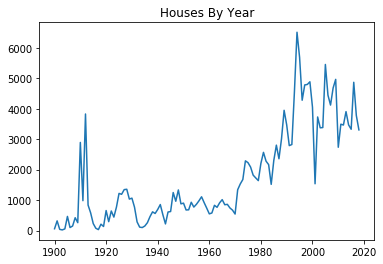

In [3]:
# 2.1	(10 points). Draw a Line Plot to show the number of houses built every year between 1900 and 2019. 
# (X-axis set as year and Y-axis set as number of houses built).

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('assignment_4_property_tax_report_2019.csv')

# Create empty dictionary
dict = {}

# Create keys for each year
for x in range(1900,2019):
    count = df.query('YEAR_BUILT == ' + str(x)).YEAR_BUILT.count()
    dict[x]=count

plt.plot(list(dict.keys()),list(dict.values()))
plt.title('Houses By Year')
    
plt.show()

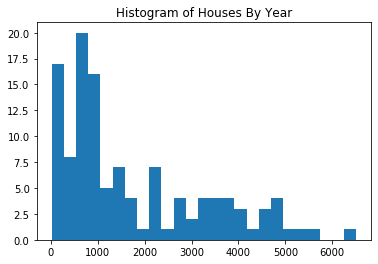

In [4]:
# 2.2	(10 points). Draw a Histogram to show the distribution of number of houses built between 1900 and 2019.
# (X-axis set as number of house built from 1900 to 2019 and Y-axis set as frequency).

import numpy as np

n_bins = 25

fig, axs = plt.subplots(1)
axs.hist(list(dict.values()), bins=n_bins)
plt.title('Histogram of Houses By Year')
plt.show()

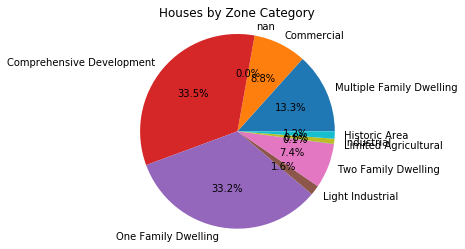

In [15]:
# 2.3	(10 points). Draw a Pie Chart to present the ratio of Top 8 zone categories of houses based on the 
# “ZONE_CATEGORY” in the total number of houses.

# Create empty dictionary
dict2 = {}
list = []
# Create keys for each year
for x in df.ZONE_CATEGORY.unique():
    list.append(x)

for y in list:
    querylist = "ZONE_CATEGORY == '" + str(y) +"'"
    count = df.query(querylist).ZONE_CATEGORY.count()
    dict2[y]=count

# Generate pie chart
fig1, ax1 = plt.subplots()
ax1.pie(dict2.values(), labels=dict2.keys(), autopct='%1.1f%%',
        shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Houses by Zone Category')
plt.show()

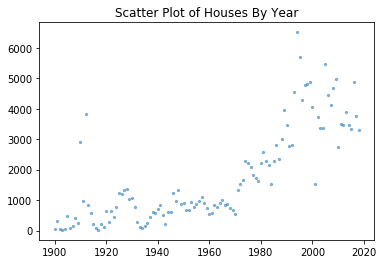

In [16]:
# 2.4	(10 points). Draw a Scatter Plot to show the number of houses built between 1900 and 2019. 
# (X-axis set as year and Y-axis set as number of houses built).

plt.scatter(dict.keys(), dict.values(), s=5, alpha=0.5)
plt.title('Scatter Plot of Houses By Year')
plt.show()